## In this notebook we will explore the Facebook ads click dataset.
***
1. Explore the features
2. Impute missing values if any
3. Build some new features from the existing ones if needed
4. Split the train and test set

In [12]:
import pandas as pd
import csv  # for finding delimiter
import seaborn as sns
import pickle
from sklearn import metrics

In [12]:
ad_click_dataset = pd.read_csv('../input/Facebook_Ads_2.csv', 
                               delimiter=',', encoding='ISO-8859-1') # the encoding is new

In [20]:
ad_click_dataset.shape

(499, 6)

**Names and emails cannot be used in this case. We don't want the model to develop a bias towards these features.**
* Country: can be treated as a categorical (nominal) variable
* Time spent on site: apply minmax scaler
* Salary: Not sure what salary means in this case, might want to scale this too

In [15]:
clean_ad_click_dataset = ad_click_dataset.drop(['Names','emails'], axis=1,
                                              inplace=False)

In [18]:
clean_ad_click_dataset.head()

,Country,Time Spent on Site,Salary,Clicked
0,Bulgaria,25.649648,55330.06006,0
1,Belize,32.456107,79049.07674,1
2,Algeria,20.945978,41098.60826,0
3,Cook Islands,54.039325,37143.35536,1
4,Brazil,34.249729,37355.11276,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59b8e51710>,
      dtype=object)

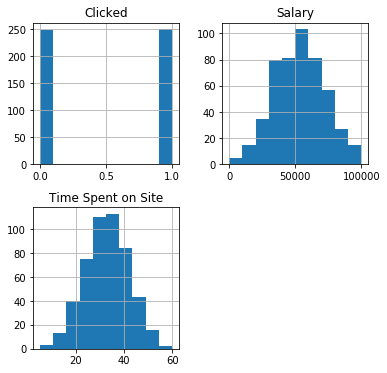

In [19]:
clean_ad_click_dataset.hist(figsize=(6,6))

**The target variable clicked looks evenly distributed(extremely rare!). Also the salary and time spent on site looks normally distributed.**

In [25]:
clean_ad_click_dataset.groupby(['Country'])['Country'].count().sort_values(ascending=False)

Country
Mauritania                                      6
Israel                                          6
Bolivia                                         6
Guinea                                          5
Laos                                            5
Iraq                                            5
Liechtenstein                                   5
Grenada                                         5
Greenland                                       5
Equatorial Guinea                               5
Samoa                                           5
Saint Barthélemy                                5
Kyrgyzstan                                      5
Algeria                                         5
Armenia                                         5
Bhutan                                          5
Sao Tome and Principe                           4
Venezuela                                       4
Andorra                                         4
Sierra Leone                              

In [27]:
len(clean_ad_click_dataset['Country'].unique())

210

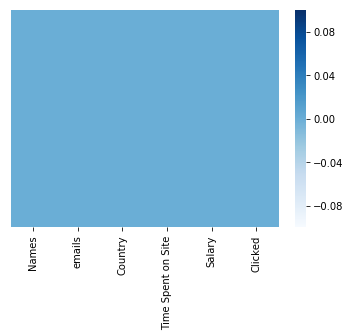

In [30]:
sns.heatmap(ad_click_dataset.isnull(), cmap="Blues", yticklabels=False)

**No missing values.**

**Analyze the train and test set created using the scripts**

In [54]:
with open('../input/train_set.pickle', 'rb') as pickle_handle:
    train_set = pickle.load(pickle_handle)

In [56]:
train_set.shape

(400, 4)

In [3]:
with open('../input/test_set.pickle', 'rb') as pickle_handle:
    test_set = pickle.load(pickle_handle)

In [4]:
test_set.head()

,Clicked,Country_encoded,Salary_scaled,Time Spent on Site_scaled
400,1,178,0.618133,0.629192
401,1,109,0.602633,0.598134
402,0,118,0.274976,0.434942
403,0,144,0.316949,0.391621
404,1,193,0.730379,0.873626


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7540030f28>,
      dtype=object)

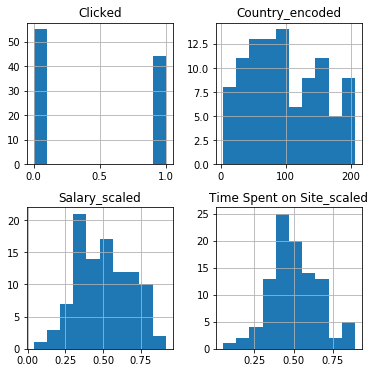

In [17]:
test_set.hist(figsize=(6,6))

In [8]:
X_test = test_set.drop('Clicked', axis=1, inplace=False)
y_test = test_set['Clicked']

## We will use the model that gave the best performance on validation set.
**It was the one from Fold 1**

In [6]:
with open('../models/LR_Ad_click_Baseline_1.pickle', 'rb') as pickle_handle:
    lr_model = pickle.load(pickle_handle)

In [11]:
# this function gives the soft probability score for each class
lr_model.predict_proba(X_test[:15])

array([[0.26211587, 0.73788413],
       [0.31892855, 0.68107145],
       [0.78615598, 0.21384402],
       [0.78392137, 0.21607863],
       [0.07010642, 0.92989358],
       [0.17339614, 0.82660386],
       [0.6470965 , 0.3529035 ],
       [0.35413773, 0.64586227],
       [0.42929931, 0.57070069],
       [0.81489929, 0.18510071],
       [0.56131974, 0.43868026],
       [0.3337429 , 0.6662571 ],
       [0.68399042, 0.31600958],
       [0.78195437, 0.21804563],
       [0.85420184, 0.14579816]])

In [14]:
# lets get all the predictions
prediction = lr_model.predict(X_test)

### Confusion Matrix
- **True Positive (TP)**: You predict that the user clicks on the Ad and it does
- **True Negative (TN)**: You predict that the user does not click on the Ad and it is not
- **False Positive (FP)**: You predict that the user clicks on the Ad, but the user does not, also known as Type 1 error
- **False Negative (FN)**: You predict that the user does not click on the Ad, but the user does, also known as Type 2 error

<img src='https://computersciencesource.files.wordpress.com/2010/01/conmat.png'>

In [15]:
print(metrics.confusion_matrix(y_test, prediction))

[[51  4]
 [ 3 41]]


### Classification Report (Precision/Recall)
- **Precision**: Focuses on your predictions. It is measuring what fraction of your predictions for the positive class are valid. It is formulated by (TP/TP+FP).
- **Recall**: Focuses on all of the possible positive classes. It's telling you how often your predictions actually capture the positive class. It is formulated by (TP/TP+FN).
- **F1-Score**: Tells you the accuracy of the classifier in classifying the data points in that particular class compared to all other class. It is calculated by taking the harmonic mean of precision and recall.
- **Support**: The support is the number of samples of the true response that lies in that class.


In [18]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        55
           1       0.91      0.93      0.92        44

    accuracy                           0.93        99
   macro avg       0.93      0.93      0.93        99
weighted avg       0.93      0.93      0.93        99



**Logistic Regression Equation**: log(p/1−p)=β0+β1x
- Log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

**Summary:**
- Logistic regression outputs the probabilities of a specific class
- Those probabilities can be converted into class predictions
- It squishes the linear regression line into an "s" shape
- Output is bounded by 0 and 1
- Loss function: log loss